In [350]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [351]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
columns = ['buying', 'maint', 'doors', 'lug_boot', 'safety', 'class']
df = pd.read_csv(url, header=None, names=columns)

In [352]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1728 entries, vhigh to low
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   lug_boot  1728 non-null   object
 4   safety    1728 non-null   object
 5   class     1728 non-null   object
dtypes: object(6)
memory usage: 94.5+ KB


In [353]:
# Check for missing values
df.isnull().sum()

buying      0
maint       0
doors       0
lug_boot    0
safety      0
class       0
dtype: int64

In [354]:
# Check for duplicates
df.duplicated().sum()

1109

In [355]:
# Group the data by the buying and class variables
grouped = df.groupby(["class", "buying"])

# Compute the size of each group and convert to a DataFrame
counts = grouped.size().reset_index(name="count")

# Print the results
print(counts)

# vgood - low
# good - low
# acc - med
# unacc - high

    class buying  count
0     acc   high    105
1     acc    low     92
2     acc    med    115
3     acc  vhigh     72
4    good    low     46
5    good    med     23
6   unacc   high    314
7   unacc    low    268
8   unacc    med    268
9   unacc  vhigh    360
10  vgood   high     13
11  vgood    low     26
12  vgood    med     26


In [356]:
# Replace incorrect values with correct values
df['doors'].replace({'more': 5}, inplace=True)

In [357]:
df

,buying,maint,doors,lug_boot,safety,class
vhigh,vhigh,2,2,small,low,unacc
vhigh,vhigh,2,2,small,med,unacc
vhigh,vhigh,2,2,small,high,unacc
vhigh,vhigh,2,2,med,low,unacc
vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...
low,low,5more,5,med,med,good
low,low,5more,5,med,high,vgood
low,low,5more,5,big,low,unacc
low,low,5more,5,big,med,good


In [358]:
# Check for incorrect values - the different values and requency
for x in df.columns:     
    print(df[x].value_counts()) 

buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
maint
2        432
3        432
4        432
5more    432
Name: count, dtype: int64
doors
2    576
4    576
5    576
Name: count, dtype: int64
lug_boot
small    576
med      576
big      576
Name: count, dtype: int64
safety
low     576
med     576
high    576
Name: count, dtype: int64
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


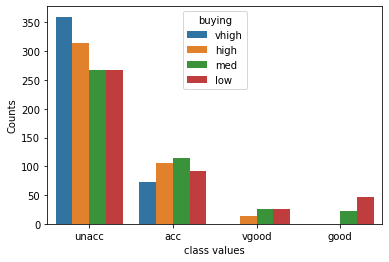

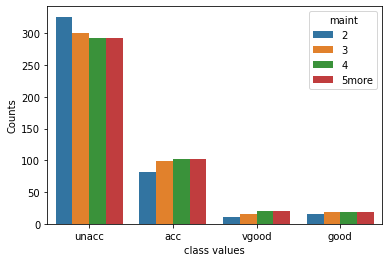

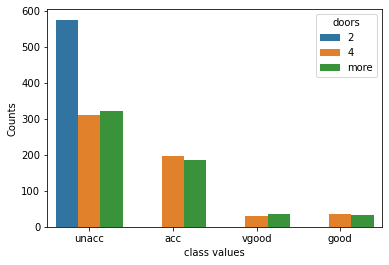

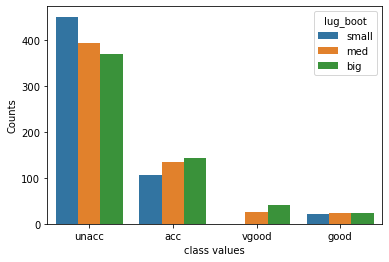

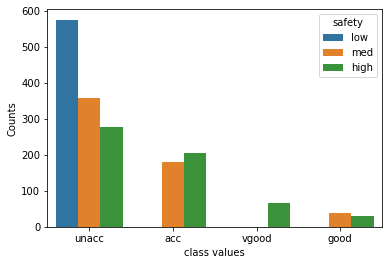

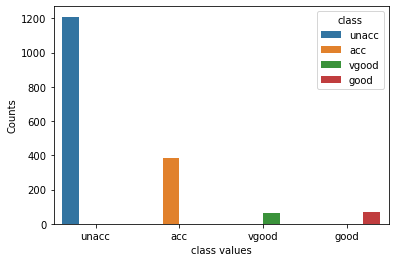

In [254]:
# plot the graphs to see the distribution
for col in df.columns:  
    sns.countplot(data=df,x ='class', hue = col)
    plt.xlabel('class values')
    plt.ylabel('Counts')
    plt.show()

In [359]:
# Convert categorical variables to numerical values
# df['buying'] = df['buying'].astype('category').cat.codes
# df['class'] = df['class'].astype('category').cat.codes
df['maint']=df['maint'].astype('category').cat.codes
df['lug_boot']=df['lug_boot'].astype('category').cat.codes
df['safety']=df['safety'].astype('category').cat.codes

In [361]:
X = df.drop(['buying', 'class'], axis=1) # drop the target classes
y = df[['class']] # target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [362]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train.values.ravel()) # use .ravel() to convert y_train to a 1D array

RandomForestClassifier(random_state=42)

In [363]:
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7947976878612717

In [364]:
prediction = rf.predict(new_data)
print(prediction) # this will output the predicted class value for the specified parameters

['acc']


In [365]:
# Define a function to compute the most likely buying value given a predicted class
def predict_buying(pred_class, given_class, car_data):
    # Compute the group counts of buying for each class
    class_counts = car_data.groupby(["class", "buying"]).size().unstack(fill_value=0)

    # Compute the total counts of buying for each class
    class_totals = class_counts.sum(axis=1)

    # Compute the most likely buying value for the predicted class
    pred_counts = class_counts.loc[pred_class]
    pred_total = class_totals.loc[pred_class]
    pred_probs = pred_counts / pred_total
    pred_buying = pred_probs.idxmax()

    # Compute the most likely buying value for the given class
    given_counts = class_counts.loc[given_class]
    given_total = class_totals.loc[given_class]
    given_probs = given_counts / given_total
    given_buying = given_probs.idxmax()

    # Compute the weighted average of the predicted and given buying values
    new_counts = given_counts + pred_counts
    new_buying = new_counts.idxmax()

    return new_buying

In [366]:
# Test the function with the example given in the question
pred_class = "acc"
given_class = "good"
predicted_buying = predict_buying(pred_class, given_class, df)
print("Predicted buying value:", predicted_buying)

Predicted buying value: low
